In [1]:
import os
os.chdir("/Users/Clair/_Machine_Learning")

In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
from random import seed
from random import randint


In [4]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [6]:
# DATASET #1
ttt_columns = ["top-left-square", "top-middle-square", "top-right-square", "middle-left-square", "middle-middle-square",
                 "middle-right-square", "bottom-left-square", "bottom-middle-square","bottom-right-square", "winner"]
ttt_data = pd.read_csv("tic-tac-toe.data", delimiter=",", names=ttt_columns, header=None)
ttt_data.replace(to_replace ="positive", value ="x_wins") 
ttt_data.replace(to_replace ="negative", value ="o_wins") 

ttt_targets = ttt_data["winner"]
ttt_data = ttt_data.drop(columns=["winner"])

In [7]:
train_data, test_data, train_targets, test_targets = train_test_split(ttt_data, ttt_targets, test_size = 0.3, shuffle = True)

In [8]:
# TREE #1



In [57]:
# DATASET #2
lens_cols = ["index","age", "prescript", "astigm", "tear_rate", "lens"]
lens_data = pd.read_csv("lenses.data", delimiter="\s+", names=lens_cols, header=None, na_values=["?"])

lens_targs = lens_data["lens"]
lens_data = lens_data.drop(columns=["lens", "index"])

In [58]:
train_data, test_data, train_targets, test_targets = train_test_split(lens_data, lens_targs, test_size = 0.2, shuffle = True)

In [59]:
# TREE #2
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(train_data, train_targets)

print("Accuracy: ", round(clf.score(test_data, test_targets) * 100, 2), "%")

Accuracy:  100.0 %


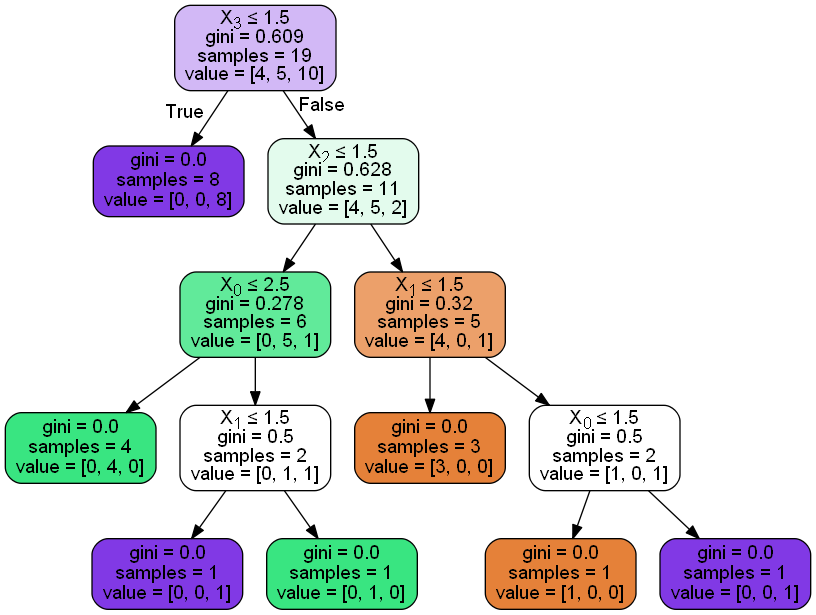

In [60]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [142]:
# DATASET #3
mpg_columns = ["mpg", "cylinders", "displacement","horsepower", "weight", "acceleration", "model year","origin", "car name"]
mpg_data = pd.read_csv("auto-mpg.data", sep="\s+", names=mpg_columns, na_values=["?"])

In [143]:
#Set the targets
data_rmv_na = mpg_data.copy()
mpg_target = mpg_data["mpg"]

#Get rid of the target and the unneeded columns
data = mpg_data.drop(columns=["mpg"])
data = mpg_data.drop(columns=["car name"])

In [144]:
# Replace missing horsepower values with the mean horsepower
data[data.isna().any(axis=1)] # shows records with NA's
data.horsepower = data.horsepower.fillna(data["horsepower"].mean())

In [145]:
train_data, test_data, train_targets, test_targets = train_test_split(data, mpg_target, test_size = 0.3, shuffle = True)
clf = tree.DecisionTreeRegressor(random_state=0)
clf.fit(train_data, train_targets)

print("Accuracy: ", round(clf.score(test_data, test_targets) * 100, 2), "%")

Accuracy:  99.79 %


In [146]:
mpg_target = data_rmv_na["mpg"]
data_rmv_na = data_rmv_na.drop(columns=["mpg", "car name"])

data_rmv_na = data_rmv_na.apply(pd.to_numeric, errors='coerce')
data_rmv_na.dropna()

print(data_rmv_na[data_rmv_na.isna().any(axis=1)])

data_rmv_na = data_rmv_na.drop(columns=["mpg", "car name"])

train_data, test_data, train_targets, test_targets = train_test_split(data_rmv_na, mpg_target, test_size = 0.3, shuffle = True)
clf = tree.DecisionTreeRegressor(random_state=0)
clf.fit(train_data, train_targets)

print("Accuracy: ", round(clf.score(test_data, test_targets) * 100, 2), "%")

     cylinders  displacement  horsepower  weight  acceleration  model year  \
32           4          98.0         NaN  2046.0          19.0          71   
126          6         200.0         NaN  2875.0          17.0          74   
330          4          85.0         NaN  1835.0          17.3          80   
336          4         140.0         NaN  2905.0          14.3          80   
354          4         100.0         NaN  2320.0          15.8          81   
374          4         151.0         NaN  3035.0          20.5          82   

     origin  
32        1  
126       1  
330       2  
336       1  
354       2  
374       1  


KeyError: "['mpg' 'car name'] not found in axis"